In [20]:
import blocksci
import matplotlib.pyplot as plt
import matplotlib.ticker
import collections
import pandas as pd
import numpy as np
%matplotlib notebook

In [43]:
chain = blocksci.Blockchain('/home/shresthanikesh23/bitcoin-data')

In [44]:
%time net_coins_per_block = chain.map_blocks(lambda block: block.net_address_type_value())

CPU times: user 12.3 s, sys: 3.59 s, total: 15.9 s
Wall time: 47 s


In [45]:
df = chain.heights_to_dates(df)

In [39]:
df = pd.DataFrame(net_coins_per_block).fillna(0).cumsum()/1e8

In [40]:
df = df.rename(columns={t:str(t) for t in df.columns})

<IPython.core.display.Javascript object>


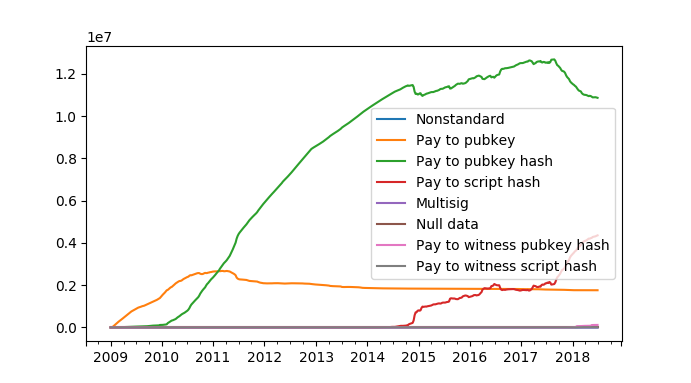

In [50]:
ax = df.resample("W").mean().plot()

In [49]:
ax.set_ylim(ymin=0)

(0, 13313558.289755534)

In [57]:
example_block_height = 465100

In [58]:
df = pd.DataFrame(chain[example_block_height].txes.fee_per_byte(), columns=["Satoshis per byte"])


In [59]:
df

,Satoshis per byte
0,0
1,1278
2,1176
3,1135
4,1135
5,1004
6,1000
7,888
8,888
9,884


<IPython.core.display.Javascript object>


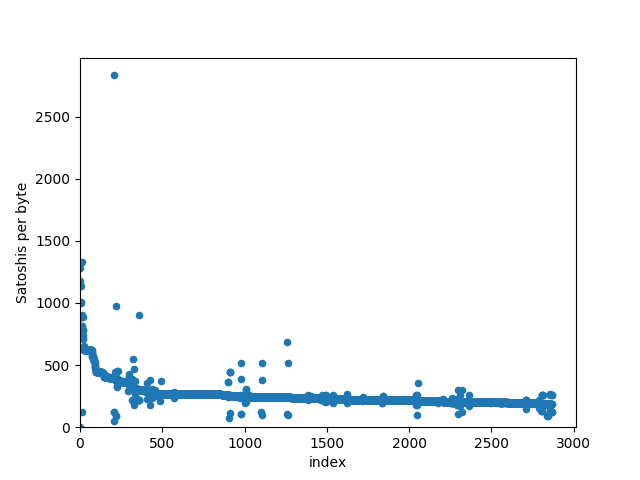

In [60]:
ax = df.reset_index().plot.scatter(x="index", y="Satoshis per byte")

In [61]:
ax.set_ylim(0)

(0, 2975.7066549642186)

In [62]:
ax.set_xlim(0)

(0, 3014.5549590217242)

In [64]:
plt.show()

In [65]:
%time txes = chain.blocks.txes.including_output_of_type(blocksci.address_type.nulldata).all

CPU times: user 23 s, sys: 4.46 s, total: 27.4 s
Wall time: 2min 38s


In [67]:
%time txes

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


[Tx(len(txins)=2, len(txouts)=1, size_bytes=314, block_height=228596, tx_index=15166673),
 Tx(len(txins)=1, len(txouts)=1, size_bytes=167, block_height=228596, tx_index=15166674),
 Tx(len(txins)=1, len(txouts)=1, size_bytes=188, block_height=228596, tx_index=15166675),
 Tx(len(txins)=1, len(txouts)=1, size_bytes=304, block_height=244591, tx_index=20255990),
 Tx(len(txins)=0, len(txouts)=288, size_bytes=9978, block_height=246816, tx_index=20736177),
 Tx(len(txins)=0, len(txouts)=282, size_bytes=9711, block_height=246875, tx_index=20750141),
 Tx(len(txins)=0, len(txouts)=234, size_bytes=8122, block_height=247191, tx_index=20823725),
 Tx(len(txins)=0, len(txouts)=235, size_bytes=8111, block_height=247196, tx_index=20824162),
 Tx(len(txins)=0, len(txouts)=230, size_bytes=7941, block_height=247329, tx_index=20858216),
 Tx(len(txins)=1, len(txouts)=2, size_bytes=267, block_height=247633, tx_index=20917305),
 Tx(len(txins)=1, len(txouts)=2, size_bytes=267, block_height=247633, tx_index=209173

In [66]:
%time labels = [(tx.block.time, blocksci.label_application(tx)) for tx in txes]

CPU times: user 2min 13s, sys: 17.5 s, total: 2min 31s
Wall time: 11min 46s


In [68]:
%time labels

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


[(datetime.datetime(2013, 3, 29, 14, 18, 58), 'Empty'),
 (datetime.datetime(2013, 3, 29, 14, 18, 58), 'Empty'),
 (datetime.datetime(2013, 3, 29, 14, 18, 58), 'Unknown'),
 (datetime.datetime(2013, 7, 3, 15, 48, 33), 'Unknown'),
 (datetime.datetime(2013, 7, 16, 6, 4, 27), 'Unknown'),
 (datetime.datetime(2013, 7, 16, 15, 13, 52), 'Unknown'),
 (datetime.datetime(2013, 7, 18, 11, 36, 19), 'Unknown'),
 (datetime.datetime(2013, 7, 18, 11, 55, 21), 'Unknown'),
 (datetime.datetime(2013, 7, 19, 7, 33, 31), 'Unknown'),
 (datetime.datetime(2013, 7, 20, 23, 16, 40), 'Unknown'),
 (datetime.datetime(2013, 7, 20, 23, 16, 40), 'Unknown'),
 (datetime.datetime(2013, 7, 24, 0, 48, 33), 'Unknown'),
 (datetime.datetime(2013, 7, 24, 3, 2, 53), 'Unknown'),
 (datetime.datetime(2013, 7, 24, 8, 34, 9), 'Unknown'),
 (datetime.datetime(2013, 7, 25, 7, 5, 21), 'Unknown'),
 (datetime.datetime(2013, 7, 25, 16, 24, 32), 'Unknown'),
 (datetime.datetime(2013, 7, 25, 19, 2, 26), 'Unknown'),
 (datetime.datetime(2013, 7, 2

In [69]:
df = pd.DataFrame(labels, columns=["date", "label"])

In [70]:
df

,date,label
0,2013-03-29 14:18:58,Empty
1,2013-03-29 14:18:58,Empty
2,2013-03-29 14:18:58,Unknown
3,2013-07-03 15:48:33,Unknown
4,2013-07-16 06:04:27,Unknown
5,2013-07-16 15:13:52,Unknown
6,2013-07-18 11:36:19,Unknown
7,2013-07-18 11:55:21,Unknown
8,2013-07-19 07:33:31,Unknown
9,2013-07-20 23:16:40,Unknown


In [71]:
df = df.reset_index().groupby(["date", "label"]).count().unstack(level=-1).fillna(0)

In [72]:
df

index  \
label               b'*K\x94V\x827C\xfe\xc9\xc0\x7fv:\x9f\x0c\xa3@~\xba\xb2\xfa\xca\xe4\x0e\xbbm\x83\xc8\xf5k\x0b\xbf\x94\xcbn\xe7\xb0\x9a$\r'   
date                                                                                                                                             
2013-03-29 14:18:58                                                0.0                                                                           
2013-07-03 15:48:33                                                0.0                                                                           
2013-07-16 06:04:27                                                0.0                                                                           
2013-07-16 15:13:52                                                0.0                                                                           
2013-07-18 11:36:19                                                0.0                                                                           
2013-07-18 11:55:21                                                0.0                                                                           
2013-07-19 07:33:31                                                0.0                                                                           
2013-07-20 23:16:40                                                0.0                                                                           
2013-07-24 00:48:33                                                0.0                                                                           
2013-07-24 03:02:53                                                0.0                                                                           
2013-07-24 08:34:09                                                0.0                                                                           
2013-07-25 07:05:21                                                0.0                                                                           
2013-07-25 16:24:32                                                0.0                                                                           
2013-07-25 19:02:26                                                0.0                                                                           
2013-07-26 06:31:28                                                0.0                                                                           
2013-07-26 15:07:52                                                0.0                                                                           
2013-07-27 03:07:22                                                0.0                                                                           
2013-07-27 07:37:08                                                0.0                                                                           
2013-07-27 20:19:54                                                0.0                                                                           
2013-07-28 05:53:04                                                0.0                                                                           
2013-07-29 12:49:05                                                0.0                                                                           
2013-07-29 17:12:37                                                0.0                                                                           
2013-07-30 04:40:56                                                0.0                                                                           
2013-08-01 07:18:48                                                0.0                                                                           
2013-08-01 13:04:19                                                0.0                                                                           
2013-08-02 06:55:15                              

In [73]:
df.columns = df.columns.droplevel()

In [74]:
df.columns

Index([        b'*K\x94V\x827C\xfe\xc9\xc0\x7fv:\x9f\x0c\xa3@~\xba\xb2\xfa\xca\xe4\x0e\xbbm\x83\xc8\xf5k\x0b\xbf\x94\xcbn\xe7\xb0\x9a$\r',
       b'\xb3\x87\xfc~\xf6K3\xcf\x01\x82\xec\xf8\xea\xb2\x065\x8cz\xc7\xb5\xa9\xd1$\x1a\x11\xd4Sb\xda\x9af\xa2\xb9l\xb6\xb6\x9b\xd7\xa6a',
                                    b"\xe3\xb0\xc4B\x98\xfc\x1c\x14\x9a\xfb\xf4\xc8\x99o\xb9$'\xaeA\xe4d\x9b\x93L\xa4\x95\x99\x1bxR\xb8U",
                b'\xfc\xf4=\xa2D\x99GZ\x96\x00#1\xb8\x97\xc8\xf3#+(\xe5z\xfd\xcb?}y\x91\xbfv\xc8\xf0\xb6\x05\x81\xa2\x89\x9d\x80\x9f\xa9',
                                                                                                                                  '1hash',
                                                                                                            '503: Bitcoin over capacity!',
                                                                                                                                'Ascribe',
                           

In [75]:
important_columns = list(df[df.index > pd.to_datetime("1-1-2016")].sum().sort_values()[-10:].index)

In [76]:
important_columns

['Monegraph',
 'Ascribe',
 'Stampery',
 'Factom',
 'Open Assets',
 'Blockstack',
 'Colu',
 'Counterparty',
 'Unknown',
 'Omni Layer']

In [77]:
important_columns = [x for x in important_columns if "Address" not in x]

In [78]:
important_columns

['Monegraph',
 'Ascribe',
 'Stampery',
 'Factom',
 'Open Assets',
 'Blockstack',
 'Colu',
 'Counterparty',
 'Unknown',
 'Omni Layer']

<IPython.core.display.Javascript object>


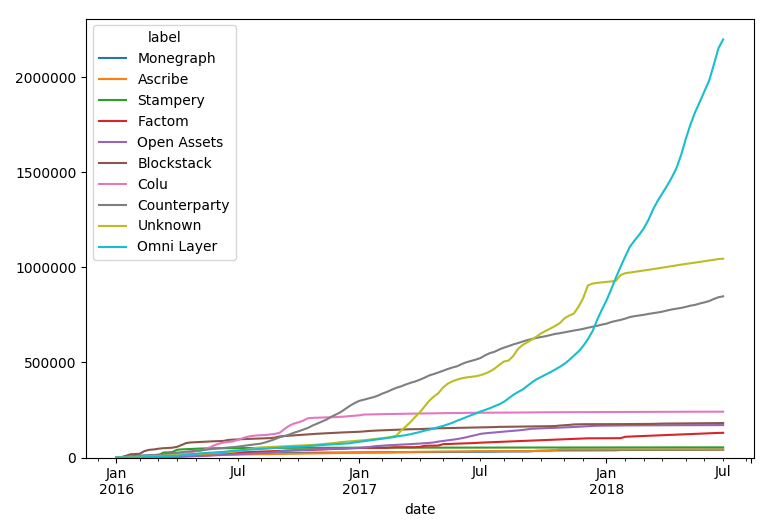

In [79]:
ax = df[df.index > pd.to_datetime("1-1-2016")].cumsum().resample("w").mean()[important_columns].plot()


In [82]:
ax.set_ylim(0)
plt.tight_layout()

In [83]:
converter = blocksci.CurrencyConverter()

In [85]:
blocks = chain.range('2017')

In [87]:
fees = blocks.fee / blocks.tx_count


In [88]:
fees

array([ 29781.58134083,  29929.08557284,  28104.0990753 , ...,
       131026.13026052,  59239.00443951, 148873.99825277])